In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Importing plotly failed. Interactive plots will not work.


In [58]:
df = read_csv('Data/service_request_compare/sr_hex.csv')

In [59]:
df2 = df.loc[((df['department'] == 'Water and Sanitation'))]

In [60]:
df2 = df2[['CreationTimestamp','h3_level8_index']]

In [61]:
df2.tail()

,CreationTimestamp,h3_level8_index
3188090,2019-12-31 15:09:47+02:00,88ad368d13fffff
3188091,2019-12-31 14:54:01+02:00,88ad368d57fffff
3188092,2019-12-31 14:51:05+02:00,88ad361323fffff
3188094,2019-12-31 11:31:09+02:00,88ad361351fffff
3188095,2019-12-31 07:25:15+02:00,88ad36155bfffff


In [62]:
df2['CreationTimestamp'] = df2.loc[:, ('CreationTimestamp')].astype(str).str[:10]

In [63]:
df2['h3_level8_index'] = df2['h3_level8_index'].astype(str)

In [64]:
df2.insert(loc=2, column='Total_Requests',value=1)

In [65]:
df2['CreationTimestamp'] = pd.to_datetime(df2['CreationTimestamp'])

In [66]:
df2 = df2.groupby(['h3_level8_index', pd.Grouper(key='CreationTimestamp', freq='W-TUE')])['Total_Requests'].sum().reset_index().sort_values('CreationTimestamp')
print (df2)

        h3_level8_index CreationTimestamp  Total_Requests
0                     0        2017-01-03             138
106484  88ad361ae1fffff        2017-01-03               2
106626  88ad361ae3fffff        2017-01-03               2
106782  88ad361ae5fffff        2017-01-03               1
106929  88ad361ae7fffff        2017-01-03               3
...                 ...               ...             ...
58964   88ad3612e3fffff        2019-12-31               7
143672  88ad368dadfffff        2019-12-31               4
152564  88ad36b921fffff        2019-12-31               1
107389  88ad361aebfffff        2019-12-31              14
87524   88ad3618e3fffff        2019-12-31               2

[185760 rows x 3 columns]


In [67]:
df3 = df2.loc[~((df2['h3_level8_index'] == '0'))]

In [68]:
df3 = df3.groupby(by=['CreationTimestamp']).sum('Total_Requests').reset_index()

In [69]:
df3.tail()

,CreationTimestamp,Total_Requests
152,2019-12-03,9481
153,2019-12-10,9540
154,2019-12-17,8470
155,2019-12-24,8243
156,2019-12-31,5044


In [70]:
# prepare expected column names
df3.columns = ['ds', 'y']

In [104]:
model = Prophet()

train, test = train_test_split(df3, test_size = 0.05, shuffle=False)
model_fit = model.fit (train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [120]:
future = model_fit.make_future_dataframe(periods=13, freq='W')
predictions = model_fit.predict(future)

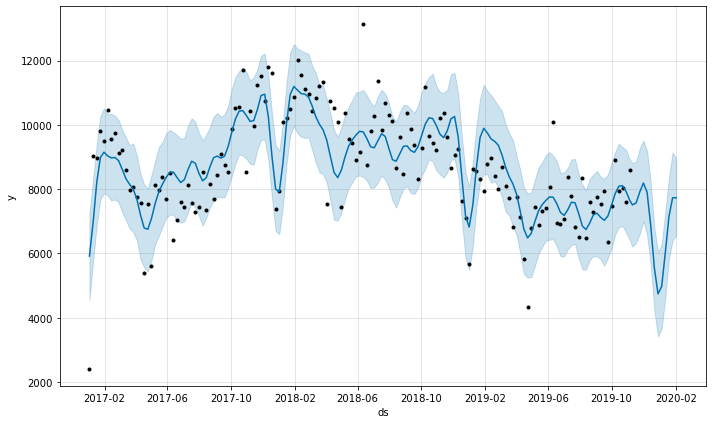

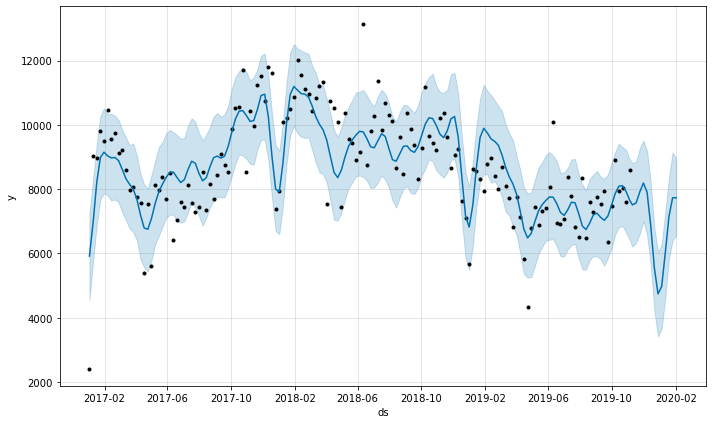

In [121]:
model_fit.plot(predictions)

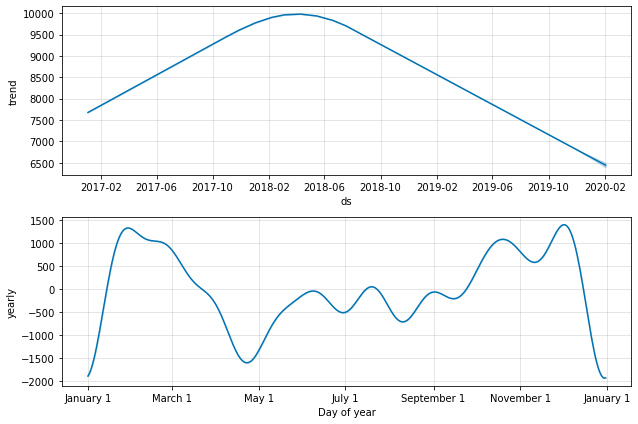

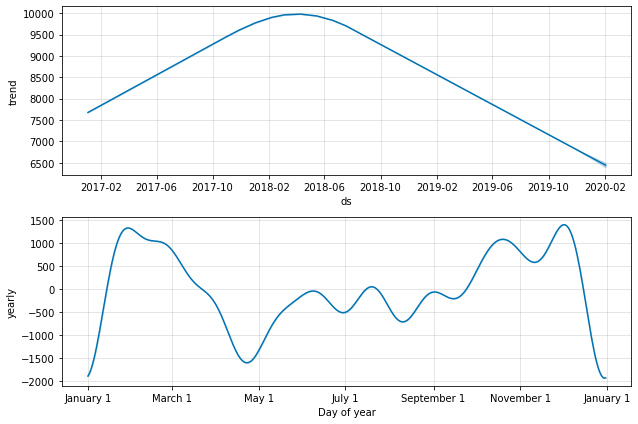

In [122]:
model_fit.plot_components(predictions)

In [123]:
predictions['yhat'] = np.round(predictions['yhat'])
final = predictions.rename({'ds': 'date','yhat' : 'Service Requests Expected'}, axis=1)

In [124]:
print("Final Answer:" )
final[['date','Service Requests Expected']].tail()


Final Answer:


,date,Service Requests Expected
157,2020-01-05,4972.0
158,2020-01-12,6024.0
159,2020-01-19,7150.0
160,2020-01-26,7734.0
161,2020-02-02,7735.0


In [125]:
df3.tail()

,ds,y
152,2019-12-03,9481
153,2019-12-10,9540
154,2019-12-17,8470
155,2019-12-24,8243
156,2019-12-31,5044
